In [4]:
import pandas as pd
import os
from pathlib import Path
import nibabel as nib
from nibabel.testing import data_path
from nilearn import plotting
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import shutil
import glob

DICOM -        https://en.wikipedia.org/wiki/DICOM

PYDICOM-       https://pypi.org/project/pydicom/
               
NIFTI -        https://brainder.org/2012/09/23/the-nifti-file-format/

NRRD -         https://en.wikipedia.org/wiki/Nrrd

DICOM2NIFTI -  https://pypi.org/project/dicom2nifti/

SIMPLEITK -    https://pypi.org/project/SimpleITK/

NRRDTONIFTI-   https://gist.github.com/ahmedhosny/0ca01caaeb0d9ece8af451ff6559d35f


In [5]:
def move_to_nrrd_folder(is_training_data):
    """
    This function moves the adc,ts-sag,t2-trans,ktrans and dwi to the respective folders
    """
    
    if is_training_data:
        path_to_data ='C:/Sapna/Graham/Capstone/data/train/nrrd_train'
        dest_sag = "C:/Sapna/Graham/Capstone/data/train/generated/nrrd/t2_sag"
        dest_tra = "C:/Sapna/Graham/Capstone/data/train/generated/nrrd/t2_tra"
        dest_adc = "C:/Sapna/Graham/Capstone/data/train/generated/nrrd/adc"
        dest_dwi = "C:/Sapna/Graham/Capstone/data/train/generated/nrrd/bval"
        dest_ktrans = "C:/Sapna/Graham/Capstone/data/train/generated/nrrd/ktrans"
    else:
        path_to_data ='C:/Sapna/Graham/Capstone/data/test/nrrd_test' 
        dest_sag = "C:/Sapna/Graham/Capstone/data/test/generated/nrrd/t2_sag"
        dest_tra = "C:/Sapna/Graham/Capstone/data/test/generated/nrrd/t2_tra"
        dest_adc = "C:/Sapna/Graham/Capstone/data/test/generated/nrrd/adc"
        dest_dwi = "C:/Sapna/Graham/Capstone/data/test/generated/nrrd/bval"
        dest_ktrans = "C:/Sapna/Graham/Capstone/data/test/generated/nrrd/ktrans"
    
    for filenames in os.listdir(path_to_data):
        if filenames.find("t2_tse_sag") != -1:
            shutil.copy(os.path.join(path_to_data + '/' + filenames),dest_sag)
        if filenames.find("t2_tse_tra") != -1:
            shutil.copy(os.path.join(path_to_data + '/' + filenames),dest_tra)
        if filenames.find("ADC") != -1:
            shutil.copy(os.path.join(path_to_data + '/' + filenames),dest_adc)
        if filenames.find("BVAL") != -1:
            shutil.copy(os.path.join(path_to_data + '/' + filenames),dest_dwi)
        if filenames.find("Ktrans") != -1:
            shutil.copy(os.path.join(path_to_data + '/' + filenames),dest_ktrans)

In [6]:
def main():
    is_training_data = False
    
    dataset_type = input('What type of data you want to move? (1-Train; 2-Test):')
    if dataset_type == str(1):
        is_training_data = True
    
    move_to_nrrd_folder(is_training_data)
    
main()

What type of data you want to move? (1-Train; 2-Test):2


In [21]:
import nrrd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.


In [24]:
filename = "C:/Sapna/Graham/Capstone/data/train/generated/nrrd/t2_tra/ProstateX-0000_t2_tse_tra_4.nrrd"

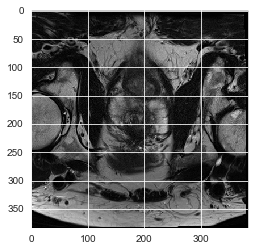

(-0.5, 383.5)
(383.5, -0.5)


In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np

f = plt.figure()
ax = f.add_subplot(111)

dwi_vol,dwi_header = nrrd.read(filename) 

slice_nr = 8
maxval = 20
dwi_vol = dwi_vol
ax.imshow(np.rot90(dwi_vol[:,:,slice_nr]),cmap='gray')

plt.show()

print (ax.get_xlim())
print (ax.get_ylim())